In [2]:
# Importing necessary Modules for code

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#importing all usefull lib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from scipy.stats import norm
%matplotlib inline
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, make_scorer 
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
import math
import warnings as wr
wr.filterwarnings('ignore')


from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [4]:
# Training Data

train_data = pd.read_csv("train.csv")
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# Test Data
test_data = pd.read_csv("test.csv")
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
# Duplicate and missing values
print('duplicated rows =',train_data.duplicated().sum())
print('columns containing missing values =',train_data.isnull().any().sum())

duplicated rows = 0
columns containing missing values = 19


In [8]:
# Extracting sales price to new df
sale_price = train_data['SalePrice'] 

# Removing sales price from train data
train_data = train_data.drop('SalePrice',axis = 1) 

In [9]:
# Concat train and test data row wise so that we can modify both at same time
total_data = pd.concat((train_data,test_data),axis = 0)
total_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
# Duplicate and Missing values in total data
print('duplicated rows =',total_data.duplicated().sum())
print('columns containing missing values =',total_data.isnull().any().sum())

duplicated rows = 0
columns containing missing values = 34


In [11]:
# Checking info of all the columns for total_data
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [12]:
# We can see we have three type of data - INT, FLOAT, OBJECT
# Int and Float are called as numerical data
# objects are categorial data type
# Visulaization technique for numerical and categorial data types are different
# We can do pearson correlation for numeric data while histogram representation for understanding 
# categorial ones.

In [13]:
# To defferentiate numerical and categorial 

data_object = total_data.select_dtypes('object')
print('object shape ',data_object.shape)
data_num = total_data.select_dtypes(['int64','float64'])
print('num shape ',data_num.shape)

object shape  (2919, 43)
num shape  (2919, 37)


In [14]:
# Checking Numerical 
data_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
# Checking Categorial  
data_object.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [16]:
#Change Ordinal features into numbers
total_data['ExterQual'] = total_data['ExterQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
total_data['ExterCond'] = total_data['ExterCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
total_data['BsmtQual'] = total_data['BsmtQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
total_data['BsmtCond'] = total_data['BsmtCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
total_data['BsmtExposure'] = total_data['BsmtExposure'].replace({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
total_data['HeatingQC'] = total_data['HeatingQC'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
total_data['KitchenQual'] = total_data['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
total_data['FireplaceQu'] = total_data['FireplaceQu'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
total_data['GarageFinish'] = total_data['GarageFinish'].replace({'Fin':3,'RFn':2,'Unf':1,'NA':0})
total_data['GarageQual'] = total_data['GarageQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
total_data['GarageCond'] = total_data['GarageCond'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0})
total_data['PavedDrive'] = total_data['PavedDrive'].replace({'Y':3,'P':2,'N':1})
total_data['PoolQC'] = total_data['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,'NA':0})
total_data['Fence'] = total_data['Fence'].replace({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'NA':0})

In [17]:
# Checking total data
total_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,3.0,Shed,700,7,2006,WD,Normal


In [18]:
print('columns containing missing values =',total_data.isnull().any().sum())

columns containing missing values = 34


In [19]:
# Finding missing values to plot a Graph
missing_counts = pd.DataFrame(total_data.isnull().sum().sort_values(ascending=False))
missing_columns = missing_counts[missing_counts.iloc[:,0]>0]
missing_columns

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageYrBlt,159
GarageFinish,159
GarageQual,159
GarageCond,159


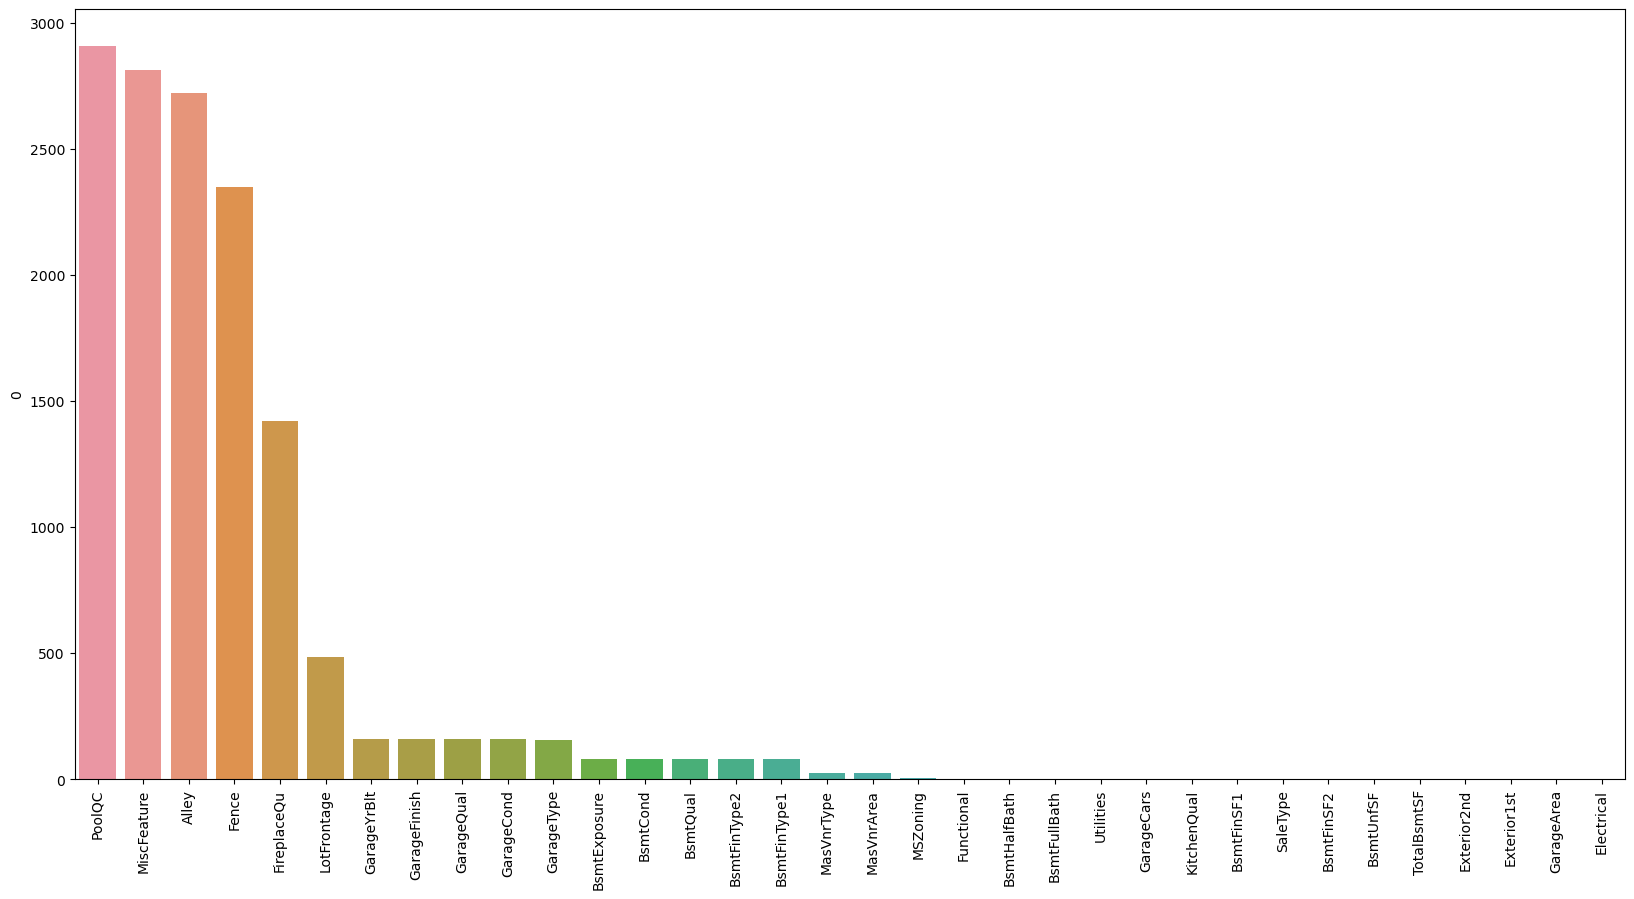

In [20]:
# Plotting
plt.figure(figsize=(20,10))
missing_columns = missing_counts[missing_counts.iloc[:,0]>0]
sns.barplot(x=missing_columns.index,y=missing_columns.iloc[:,0])
plt.xticks(rotation=90)
plt.show()

In [21]:
total_data.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
                 ... 
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [22]:
#delete features with more than 1000 missing values
drop_col = list(missing_counts[missing_counts.iloc[:,0] > 1000].index)
try:
    total_data = total_data.drop(columns=drop_col,axis=0)
    missing_columns = missing_columns.drop(index=drop_col,axis=1)
except:
    pass

In [23]:
print(total_data[missing_columns.index].info())
# Since some numerical features are ordinal ones
# it would be more reasonable to use median as the default values
# as for categorical ones, we opt for the mode category
missing_object = total_data[missing_columns.index].select_dtypes('object').columns
print('missing object',len(missing_object))
missing_num = total_data[missing_columns.index].select_dtypes(['int64','float64']).columns
print('missing num ',len(missing_num))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2433 non-null   float64
 1   GarageYrBlt   2760 non-null   float64
 2   GarageFinish  2760 non-null   float64
 3   GarageQual    2760 non-null   float64
 4   GarageCond    2760 non-null   float64
 5   GarageType    2762 non-null   object 
 6   BsmtExposure  2837 non-null   float64
 7   BsmtCond      2837 non-null   float64
 8   BsmtQual      2838 non-null   float64
 9   BsmtFinType2  2839 non-null   object 
 10  BsmtFinType1  2840 non-null   object 
 11  MasVnrType    2895 non-null   object 
 12  MasVnrArea    2896 non-null   float64
 13  MSZoning      2915 non-null   object 
 14  Functional    2917 non-null   object 
 15  BsmtHalfBath  2917 non-null   float64
 16  BsmtFullBath  2917 non-null   float64
 17  Utilities     2917 non-null   object 
 18  GarageCars    2918 non-null 

In [24]:
# Filling up the missing values
for i in missing_num:
    total_data[i] = total_data[i].fillna(total_data[i].median())
for j in missing_object:
    total_data[j] = total_data[j].fillna(total_data[j].mode()[0])
print(total_data.isnull().any().sum())

0


In [25]:
# We already checked outliers in our last code so we will use the same data

In [26]:
# Encoding the data with get_dummies
data_all_processed_x = pd.get_dummies(total_data)
data_all_processed_x

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,3,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [27]:
# Extracting Training and Testing data
training_data = data_all_processed_x.head(1460)
testing_data = data_all_processed_x.tail(1459)

In [28]:
training_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [29]:
training_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [30]:
sale_price

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [31]:

x_train,x_test,y_train,y_test=train_test_split(training_data,sale_price,test_size=.20,random_state=40)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 236)
(292, 236)
(1168,)
(292,)


In [33]:
# Importing Model

from sklearn import tree
model = tree.DecisionTreeRegressor()

In [34]:
# Training model
model = model.fit(x_train,y_train)

In [35]:
# Predicting on Test values
predict = model.predict(x_test)

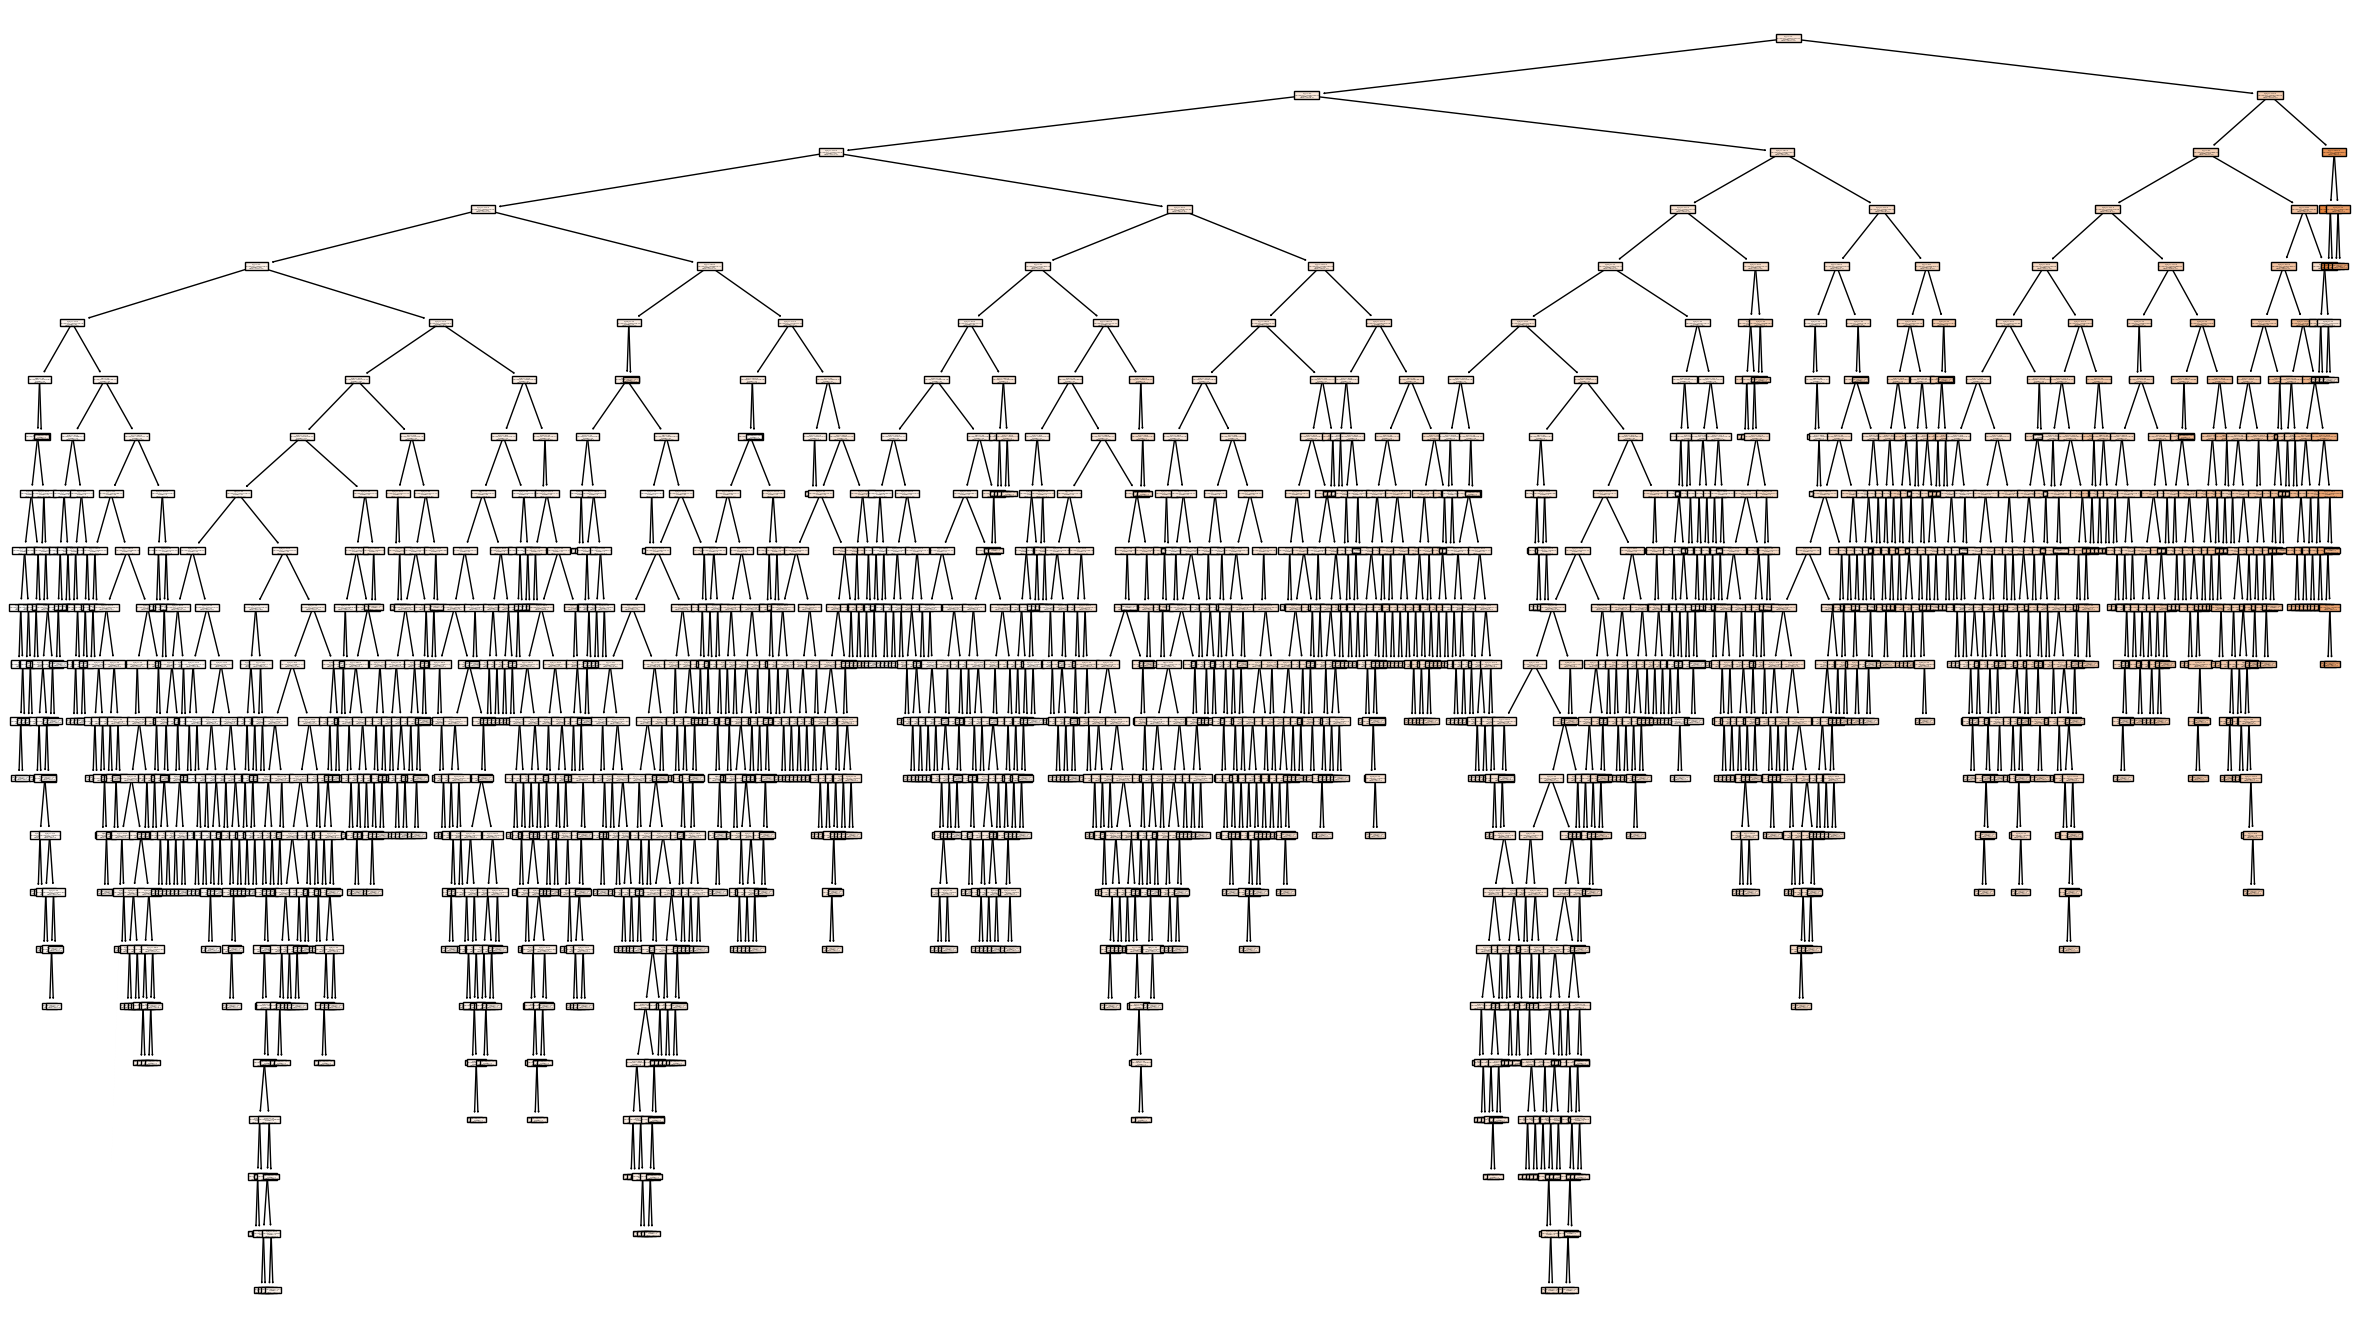

In [47]:
from sklearn import tree

plt.figure(figsize=(30, 17))
tree.plot_tree(model, filled=True)
plt.show()

In [36]:
# R square score for the model
print(np.sqrt(mean_squared_error(y_test,predict)))

36276.60446283169


In [37]:
# R^2 value on test data
r_square = r2_score(y_test, predict)
r_square

0.7450933601932873

In [38]:
# Predicting SalePrice using Decision Tree
y_model_prerfc = model.predict(testing_data)

In [39]:
#Here we can See predict Sale Price
y_model_prerfc=np.around(y_model_prerfc,0)
y_model_prerfc = y_model_prerfc.flatten()
y_model_prerfc

array([132500., 154000., 187500., ..., 154000.,  93500., 222000.])

In [40]:
prediction=np.array(y_model_prerfc).tolist()


In [41]:
testing_data.insert(1,column="SalePrice",value=prediction)
testing_data.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,132500.0,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,154000.0,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,187500.0,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,177500.0,60,78.0,9978,6,6,1998,1998,20.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,184100.0,120,43.0,5005,8,5,1992,1992,0.0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
predict_sub=testing_data.drop(testing_data.iloc[:,2:],axis=1)
predict_sub.head()

,Id,SalePrice
0,1461,132500.0
1,1462,154000.0
2,1463,187500.0
3,1464,177500.0
4,1465,184100.0


In [43]:
predict_sub.shape

(1459, 2)

###  Using  Gridsearch & Cross Validation appropriately.

In [48]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = [{"max_depth":[7,8,10,14,16,20, None]}]

In [82]:
from sklearn.tree import DecisionTreeRegressor

gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),param_grid = param_grid,scoring = 'r2',cv=5)

In [83]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [7, 8, 10, 14, 16, 20, None]}],
             scoring='r2')

In [84]:
gs.cv_results_['params']

[{'max_depth': 7},
 {'max_depth': 8},
 {'max_depth': 10},
 {'max_depth': 14},
 {'max_depth': 16},
 {'max_depth': 20},
 {'max_depth': None}]

In [85]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=16, random_state=123)

In [86]:
pred = gs.predict(x_test)

In [87]:
r2_score(pred,y_test)

0.7635952943432547